In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u_1 = np.array([2,2])
u_2 = np.array([-5,-3])

In [3]:
cov_1 = np.array([[0.5, 1], [1, 1]])
cov_2 = np.array([[1.5 ,1], [0.1, 1]])

In [4]:
d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
d_2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8540\103381402.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8540\103381402.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d_2 = np.random.multivariate_normal(u_2, cov_2, 500)


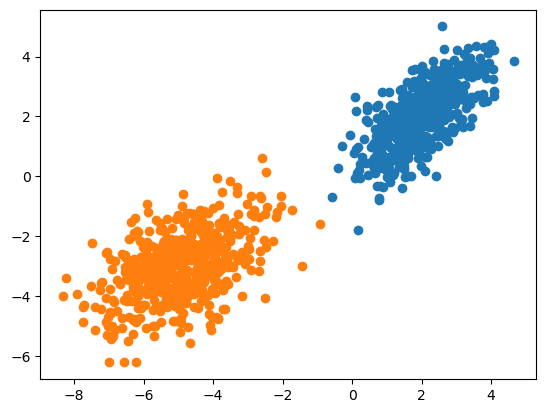

In [5]:
plt.scatter(d_1[:, 0], d_1[:, 1])
plt.scatter(d_2[:, 0], d_2[:, 1])

In [6]:
dataset = np.ones((1000, 4))

In [7]:
dataset[:5]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [8]:
dataset[:500, 1:3] = d_1

In [9]:
dataset[500:, 1:3] = d_2

In [10]:
dataset[500:,-1] = 0

In [11]:
dataset[:5, :]

array([[1.        , 2.2518023 , 1.10364266, 1.        ],
       [1.        , 0.61293683, 0.36918286, 1.        ],
       [1.        , 1.14821747, 0.58896613, 1.        ],
       [1.        , 2.29371389, 2.24438684, 1.        ],
       [1.        , 3.77453462, 2.47028366, 1.        ]])

In [12]:
dataset[-5:,:]

array([[ 1.        , -5.31188539, -2.14851548,  0.        ],
       [ 1.        , -2.9814193 , -2.75992099,  0.        ],
       [ 1.        , -7.03930156, -5.31294769,  0.        ],
       [ 1.        , -4.96449945, -3.69771942,  0.        ],
       [ 1.        , -5.05171053, -3.60265244,  0.        ]])

In [13]:
dataset

array([[ 1.        ,  2.2518023 ,  1.10364266,  1.        ],
       [ 1.        ,  0.61293683,  0.36918286,  1.        ],
       [ 1.        ,  1.14821747,  0.58896613,  1.        ],
       ...,
       [ 1.        , -7.03930156, -5.31294769,  0.        ],
       [ 1.        , -4.96449945, -3.69771942,  0.        ],
       [ 1.        , -5.05171053, -3.60265244,  0.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
x_train = dataset[:800, :-1]
y_train = dataset[:800,-1]
x_test = dataset[800:, :-1]
y_test = dataset[800:, -1]

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 3), (800,), (200, 3), (200,))

In [17]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [18]:
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))


def hypothesis(X, theta):
    return 1/(1 + np.exp(-np.dot(X, theta)))

In [19]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1-Y)*np.log(1-y_p)))
    
    return loss

In [20]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = X.T@(Y - y_p)  # (n,m).(m,1) = (n,1) grad = np.dot(X, (Y - y_p))
    
    return grad/X.shape[0]


In [21]:
def gradient_descent(X,Y, learning_rate = 0.3, epochs = 100):
    
    m,n = X.shape
    
    theta = np.zeros((n, 1))
    print(theta.shape)
    cost_epoch = []
    
    for i in range(epochs):
        print('The algo is on epoch no : ', i, end = '\r')
        
        loss = cost(X, Y , theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
    
    print(grad.shape, theta.shape, y_train.shape,x_train.shape)
    return theta, cost_epoch    

In [22]:
y_train = y_train.reshape((-1, 1))
y_train.shape

(800, 1)

In [23]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.03, epochs = 100)

(3, 1)
(3, 1) (3, 1) (800, 1) (800, 3)


In [24]:
theta.shape

(3, 1)

In [25]:
cost_epoch

[0.6931471805599452,
 0.5633607116037357,
 0.47323893118520916,
 0.40880347744111534,
 0.3610534478327153,
 0.3244447257940901,
 0.29553534649871016,
 0.2721287604327998,
 0.252776505501452,
 0.23649212276133064,
 0.22258354718013304,
 0.2105521509184757,
 0.20003008775980177,
 0.19074025712175177,
 0.1824700138735357,
 0.17505346635390664,
 0.16835928184724125,
 0.1622821100722652,
 0.15673643666822354,
 0.1516521021992172,
 0.14697098409345608,
 0.14264450452059832,
 0.13863173409093438,
 0.13489793158370134,
 0.13141340701188178,
 0.128152627400915,
 0.12509350683160372,
 0.1222168378470354,
 0.1195058323732863,
 0.11694574825357612,
 0.11452358328139707,
 0.11222782287467446,
 0.1100482306962607,
 0.1079756738992365,
 0.1060019764718782,
 0.10411979552840375,
 0.10232251644667162,
 0.10060416357188429,
 0.09895932384386667,
 0.0973830812073389,
 0.0958709600615499,
 0.09441887632151708,
 0.09302309491593007,
 0.09168019275022501,
 0.09038702632791398,
 0.08914070335705368,
 0.08793

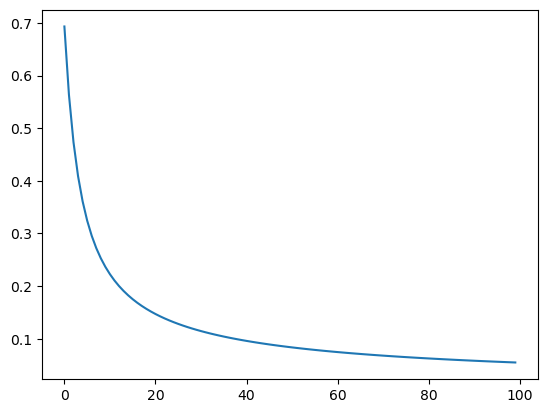

In [26]:
plt.plot(cost_epoch)

In [27]:
y_test = y_test.reshape((-1, 1))

In [28]:
y_test.shape

(200, 1)

In [29]:
print(x_test.shape, y_test.shape)

(200, 3) (200, 1)


In [30]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []
    
    for i in y_p:
        
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)
    
    return y_pred

In [31]:
pred = predict(x_test, theta)

In [32]:
pred = pred.reshape((-1,1))

In [33]:
pred.shape[1]

1

In [34]:
def accuracy(y_pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        
        if y_pred[i] == label[i]:
            
            temp += 1
        else:
            pass
        
        
    print("Accuracy = ", (temp/pred.shape[0])*100, "%")    
    
    

In [35]:
accuracy(pred, y_test)

Accuracy =  99.5 %


In [36]:
predict([1,-12,3], theta)

array([0])

In [37]:
y_test = y_test.reshape((-1, 1))

In [38]:
y_test.shape

(200, 1)

In [39]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []
    
    for i in y_p:
        if i >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    y_pred = np.array(y_pred)
    return y_pred        

In [40]:
pred = predict(x_test, theta)

In [41]:
pred = pred.reshape((-1,1))

In [42]:
pred.shape[0]

200

In [43]:
def accuracy(y_pred, label):
    
    temp = 0
    for i in range(pred.shape[0]):
        
        if y_pred[i] == label[i]:
            temp += 1
        else:
            pass
        
    print("Accuracy = ", (temp/pred.shape[0])*100,"%")

In [44]:
accuracy(pred, y_test)

Accuracy =  99.5 %


In [45]:
predict([0.2312, 0.124231, 0.987654], theta)

array([1])

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(dataset[:, :-1], dataset[:, -1], 
                                                    test_size=0.2, random_state=223)

In [48]:
model = LogisticRegression()
model

LogisticRegression()

In [49]:
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
pred = model.predict(x_test)

In [51]:
pred.shape

(200,)

In [52]:
y_test.shape

(200,)

In [53]:
pred = pd.DataFrame(pred)

In [54]:
model.predict([x_test[0]])

array([1.])

In [55]:
f1_score(y_test, pred)

1.0

In [56]:
precision_score(y_test, pred)

1.0

In [57]:
recall_score(y_test, pred)

1.0

In [58]:
cn = confusion_matrix(y_test, pred)

<Axes: >

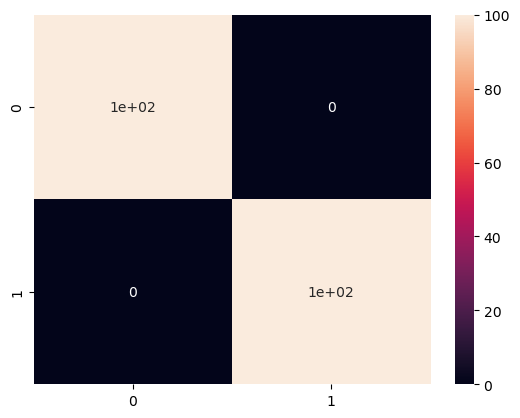

In [59]:
sns.heatmap(cn, annot = True)

In [60]:
df = pd.read_csv('Titanic-Dataset.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [63]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [65]:
median = df['Age'].median()
mode = df['Embarked'].mode()

In [66]:
mode = df['Embarked'].mode()

In [67]:
mode[0]

'S'

In [68]:
df['Embarked'] = df['Embarked'].fillna(mode[0])

In [69]:
df['Age']  = df['Age'].fillna(median)

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [71]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [72]:
Data = pd.get_dummies(df, columns = ['Sex', 'Embarked'])

In [73]:
Data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [74]:
Data['Embarked_C'] = np.where((Data['Embarked_C'] == True), 1, 0)
Data['Embarked_Q'] = np.where((Data['Embarked_Q'] == True), 1, 0)
Data['Embarked_S'] = np.where((Data['Embarked_S'] == True), 1, 0)
Data['Sex_male'] = np.where((Data['Sex_male'] == True), 1, 0)
Data['Sex_female'] = np.where((Data['Sex_female'] == True), 1, 0)

In [75]:
Data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [76]:
y = Data['Survived']
X = Data.drop(columns = ['Survived', 'PassengerId'])

In [77]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [78]:
X = X.values

In [79]:
one = np.ones((X.shape[0], 1))

In [80]:
X = np.hstack((one, X))

In [81]:
x_train = X[:800,:]
x_test = X[800:,:]
y_train = y[:800]
y_test = y[800:]

In [82]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 11) (800,) (91, 11) (91,)


In [83]:
y_train = pd.DataFrame(y_train)

In [84]:
y_train = y_train.values

In [85]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 11) (800, 1) (91, 11) (91,)


In [86]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.0001, epochs = 90000)

(11, 1)


(11, 1) (11, 1) (800, 1) (800, 11)


In [87]:
cost_epoch

[0.6931471805599452,
 0.691046999785307,
 0.6890369432194438,
 0.6871101900620822,
 0.6852607883923519,
 0.6834835346514169,
 0.6817738625976345,
 0.6801277445653513,
 0.6785416059039684,
 0.6770122522360726,
 0.6755368084765465,
 0.674112668232043,
 0.6727374521172681,
 0.6714089735823017,
 0.6701252109763075,
 0.6688842847342573,
 0.6676844387389025,
 0.6665240250659434,
 0.6654014914593686,
 0.6643153710039559,
 0.6632642735631705,
 0.6622468786346815,
 0.6612619293445724,
 0.6603082273572342,
 0.6593846285230437,
 0.6584900391221342,
 0.6576234125915067,
 0.6567837466457981,
 0.6559700807203614,
 0.6551814936798823,
 0.6544171017472956,
 0.6536760566169154,
 0.6529575437229345,
 0.6522607806401798,
 0.6515850155985486,
 0.6509295260961377,
 0.650293617598922,
 0.649676622317092,
 0.6490778980499402,
 0.6484968270926048,
 0.6479328151991033,
 0.6473852905969841,
 0.6468537030496344,
 0.6463375229628572,
 0.6458362405327839,
 0.6453493649325582,
 0.6448764235355278,
 0.64441696117291

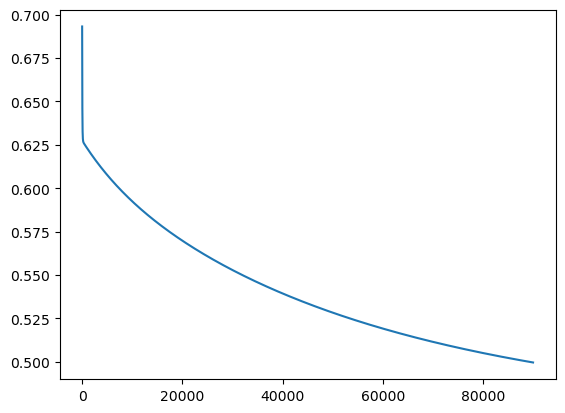

In [88]:
plt.plot(cost_epoch)

In [89]:
y_test = pd.DataFrame(y_test)

In [90]:
y_test = y_test.values

In [91]:
pred = predict(x_test, theta)

In [92]:
accuracy(pred, y_test)

Accuracy =  83.51648351648352 %


In [93]:
a = predict([1,2.34, 1.8765,245,4.15654,0.756554,5.6,5.555543,2,9,1], theta)
b = predict([1,1, 1,-1,1,0.756554,5.6,5.555543,2,9,1], theta)

In [94]:
if a[0] == 1:
    print('Alive')
else:
    print("Dead")
    
if b[0]==1:
    print('Alive')
else:
    print("Dead")

Dead
Alive
